In [5]:
from astropy.table import QTable
import numpy as np
from pathlib import Path
from ctlearn_manager import CTLearnModelManager, CTLearnTriModelManager

# Utilitaire

In [6]:
# class CTLearnModelManager():

#     def __init__(self, model_nickname,
#     notes,
#     model_dir,
#     reco,
#     telescope_names,
#     telescopes_indices,
#     training_gamma_dirs,
#     training_proton_dirs,
#     training_gamma_zenith_distances,
#     training_gamma_azimuths,
#     training_proton_zenith_distances,
#     training_proton_azimuths):
        
#         self.model_nickname = model_nickname
#         self.notes = notes
#         self.model_dir = f"{model_dir}/{model_nickname}"
#         self.reco = reco
#         self.telescope_names = telescope_names
#         self.telescopes_indices = telescopes_indices
#         self.training_gamma_dirs = training_gamma_dirs
#         self.training_proton_dirs = training_proton_dirs
#         self.training_gamma_zenith_distances = training_gamma_zenith_distances
#         self.training_gamma_azimuths = training_gamma_azimuths
#         self.training_proton_zenith_distances = training_proton_zenith_distances
#         self.training_proton_azimuths = training_proton_azimuths
#         self.columns = ['model_index', 
#            'model_nickname', 'model_name', 
#            'model_dir',
#            'reco', 
#            'telescope_names', 'telescopes_indices', 
#            'training_gamma_dirs', 'training_proton_dirs', 
#            'training_gamma_zenith_distances', 'training_gamma_azimuths', 
#            'training_proton_zenith_distances', 'training_proton_azimuths', 
#            'notes', 
#            'zd_range', 'az_range',
#            'testing_gamma_dirs', 'testing_proton_dirs',
#            'testing_gamma_zenith_distances', 'testing_gamma_azimuths',
#            'testing_proton_zenith_distances', 'testing_proton_azimuths',]
#         self.stereo = True if len(self.telescopes_indices) > 1 else False
#         if self.reco == 'type' and (len(self.training_proton_dirs) == 0 or len(self.training_gamma_dirs) == 0):
#             raise ValueError("For reco type, training_proton_dirs and training_gamma_dirs are required")
#         # if self.reco == 'type' & (len(self.training_proton_dirs) == 0 or len(self.training_gamma_dirs) == 0):
#         #     raise ValueError("For reco type, training_proton_dirs and training_gamma_dirs are required")
#         # Check that all gamma related lists are the same length
#         gamma_lengths = [len(self.training_gamma_dirs), len(self.training_gamma_zenith_distances), len(self.training_gamma_azimuths)]
#         if len(set(gamma_lengths)) != 1:
#             raise ValueError("All gamma related lists must be the same length")

#         # Check that all proton related lists are the same length
#         proton_lengths = [len(self.training_proton_dirs), len(self.training_proton_zenith_distances), len(self.training_proton_azimuths)]
#         if len(set(proton_lengths)) != 1:
#             raise ValueError("All proton related lists must be the same length")
        
#         # Model parameters
#         self.zd_range = [min(self.training_gamma_zenith_distances), max(self.training_gamma_zenith_distances)]
#         self.az_range = [min(self.training_gamma_azimuths), max(self.training_gamma_azimuths)]
#         self.model_name = f"{self.reco}_TEL{'_'.join(map(str, self.telescopes_indices))}_ZD{'_'.join(map(str, self.training_gamma_zenith_distances))}_Az{'_'.join(map(str, self.training_gamma_azimuths))}"
#         print(f"🧠 Model name: {self.model_name}")
        
        
#     def save_to_index(self, MODEL_INDEX_FILE):
#         try:
#             models_table = QTable.read(MODEL_INDEX_FILE)
#             model_index = models_table['model_index'][-1] + 1
#         except:
#             models_table = QTable(names=self.columns,  
#                                 #   units=[None, None, None, None, None, None, None, None, 'deg', 'deg', 'deg', 'deg', None, 'deg', 'deg', None, None, 'deg', 'deg', 'deg', 'deg'],
#                                 dtype=[int,
#                                         str, str, 
#                                         str, str,
#                                         list, list, 
#                                         list, list, 
#                                         list, list, 
#                                         list, list, 
#                                         str, 
#                                         list, list,
#                                         list, list,
#                                         list, list,
#                                         list, list])
#             print(f"Model index did not exist, will create {MODEL_INDEX_FILE}")
#             model_index = 0
#         # if not Path(self.model_dir).exists():
#         #     Path(self.model_dir).mkdir()
#         #     print(f"Model directory {self.model_dir} created")
#         if (self.model_nickname not in models_table['model_nickname']):
#             models_table.add_row([model_index, 
#                                 self.model_nickname, self.model_name, 
#                                 self.model_dir,
#                                 self.reco, self.telescope_names, self.telescopes_indices, 
#                                 self.training_gamma_dirs, self.training_proton_dirs, 
#                                 self.training_gamma_zenith_distances, self.training_gamma_azimuths, 
#                                 self.training_proton_zenith_distances, self.training_proton_azimuths, 
#                                 self.notes, 
#                                 self.zd_range, self.az_range, 
#                                 [], [], 
#                                 [], [], 
#                                 [], []])
#             models_table.write(MODEL_INDEX_FILE, format='ascii.ecsv', serialize_method='data_mask', overwrite=True)
#             print(f"✅ Model nickname {self.model_nickname} added to table")
#         else:
#             print(f"❌ Model nickname {self.model_nickname} already in table")
        
        
#     def launch_training(self, n_epochs=15):
#         import glob
#         import os
#         models_dir = np.sort(glob.glob(f"{self.model_dir}*"))
#         load_model = False
#         if len(models_dir) > 0 :
#             last_model_dir = Path(models_dir[-1])
#             size = sum(f.stat().st_size for f in last_model_dir.glob('**/*') if f.is_file())
#             model_version = int(models_dir[-1].split("_v")[-1])
#             if size > 1e6:
#                 model_version += 1
#                 print(f"➡️ Model already exists: will continue training and create \n📁 {self.model_nickname}_v{model_version}")
#                 save_best_validation_only = True
#                 model_dir = f"{self.model_dir}_v{model_version}/"
#                 model_to_load = f"{self.model_dir}_v{model_version - 1}/ctlearn_model.cpk/"
#                 load_model = True
#                 os.system(f"mkdir -p {model_dir}")
#             else :
#                 model_dir = f"{self.model_dir}_v{model_version}/"
#                 if model_version > 0:
#                     model_to_load = f"{self.model_dir}_v{model_version - 1}/ctlearn_model.cpk/"
#                     load_model = True
#                     print(f"➡️ Model already exists: will continue training and create \n📁 {self.model_nickname}_v{model_version}")
#                     save_best_validation_only = True
#                 else:
#                     print(f"🆕 Model does not exist: will create \n📁 {self.model_nickname}_v{model_version}")
#                     save_best_validation_only = False
#         else:
#             model_version = 0
#             print(f"🆕 Model does not exist: will create \n📁 {self.model_nickname}_v{model_version}")
#             model_dir = f"{self.model_dir}_v{model_version}/"
#             os.system(f"mkdir -p {model_dir}")
#             save_best_validation_only = False

#         load_model_string = f"--TrainCTLearnModel.model_type=LoadedModel --LoadedModel.load_model_from={model_to_load} " if load_model else ""
#         background_string = f"--background {self.training_proton_dirs[0]} " if self.reco == 'type' else "" #FIXM loop over protons/gamma dirs and add patterns
#         signal_patterns = ""
#         background_patterns = ""
#         # for ze, az in zip(zes, azs):
#         #     signal_patterns += f'--pattern-signal "gamma_theta_{ze:.3f}_az_{az:.3f}_runs*.dl1.h5" '
#         # if reco == 'type':
#         #     for ze, az in zip(zes_protons, azs_protons):
#         #         background_patterns += f'--pattern-background "proton_theta_{ze:.3f}_az_{az:.3f}_runs*.dl1.h5" '

#         stereo_mode = 'stereo' if self.stereo else "mono"
#         stack_telescope_images = 'true' if self.stereo else 'false'
#         min_telescopes = 2 if self.stereo else 1
#         allowed_tels = '_'.join(map(str, self.telescopes_indices)) if self.stereo else int(self.telescopes_indices[0])
#         cmd = f"ctlearn-train-model {load_model_string}\
#             --signal {self.training_gamma_dirs[0]} {signal_patterns}\
#             {background_string}{background_patterns}\
#             --reco {self.reco} \
#             --output {model_dir} \
#             --DLImageReader.channels=cleaned_image \
#             --DLImageReader.channels=cleaned_relative_peak_time \
#             --TrainCTLearnModel.n_epochs={n_epochs} \
#             --verbose \
#             --TrainCTLearnModel.save_best_validation_only=True\
#             --overwrite \
#             --DLImageReader.mode={stereo_mode} \
#             --TrainCTLearnModel.stack_telescope_images={stack_telescope_images}\
#             --DLImageReader.min_telescopes={min_telescopes}"# \
#             #--DLImageReader.allowed_tels={allowed_tels}"
#         print(cmd)
#         !{cmd}
    
#     # def launch_testing(self):
#     #     # self.
#     #     pass
    
#     # def produce_irfs(self):
#     #     pass
    
#     def plot_loss(self):
#         import matplotlib.pyplot as plt
#         import pandas as pd
#         import glob
#         training_log = np.sort(glob.glob(f"{self.model_dir}_v*/training_log.csv"))[-1]
#         if Path(training_log).exists():
#             df = pd.read_csv(training_log)
#             plt.plot(df['epoch'], df['loss'], label=f"Training")
#             plt.plot(df['epoch'], df['val_loss'], label=f"Testing", ls='--')
#             plt.title(f"{self.reco} training")
#             plt.xlabel('Epoch')
#             plt.ylabel('Loss')
#             plt.legend()
#             plt.show()
#         else:
#             print(f"Model has not yet been trained.")

# 🧠 Create new CTLearnModelManager
CTLearnModelManager is an object that allows you to setup, train, test and benchmark a CTLearn model

In [7]:
MODEL_INDEX_FILE = "/home/blacave/CTLearn/Software/CTLearn-Manager/ctearn_models_index.ecsv"

In [8]:
# General parameters
model_parameters = {
    'model_nickname' : "direction_20deg",
    'model_dir' : "/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/",
    'notes' : "Stereo model for 20deg zenith distance",
    'reco' : 'energy', #["energy", "direction", "type"]
    'channels' : ['cleaned_image', 'cleaned_relative_peak_time'], # Order matters
    'telescope_names' : ['SST1M_1', 'SST1M_2'],
    'telescopes_indices' : [1, 2],
    'training_gamma_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Gamma_diffuse/20deg/merged/'],
    'training_proton_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Proton/20deg/merged/'],
    'training_gamma_zenith_distances' : [20],
    'training_gamma_azimuths' : [0],
    'training_proton_zenith_distances' : [20],
    'training_proton_azimuths' : [0],
    'max_training_epochs' : 15,
    
}
new_model = CTLearnModelManager(model_parameters, MODEL_INDEX_FILE)
new_model.save_to_index()

🧠 Model name: energy_TEL1_2_ZD20_Az0
❌ Model nickname direction_20deg already in table


🛑 Model already trained for 17 epochs. Will not train further.


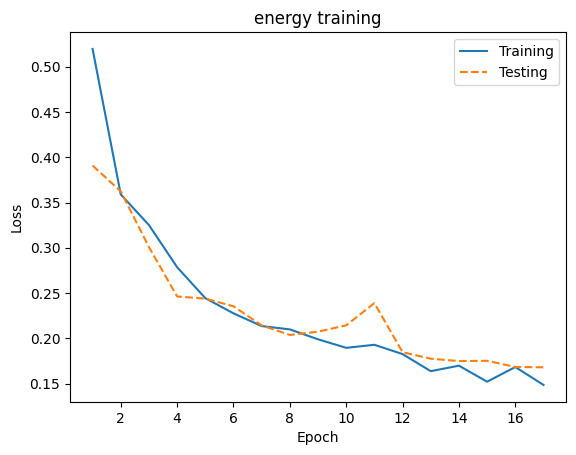

In [7]:
new_model.launch_training(n_epochs=17)

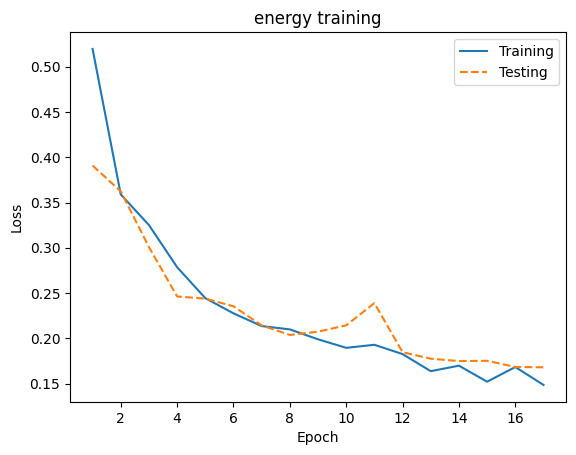

In [6]:
new_model.plot_loss()